In [1]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import API key
from config import weather_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lons = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lons = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lons = zip(lats, lons)

# Identify nearest city for each lat, lng combination
for lat_lon in lat_lons:
    city = citipy.nearest_city(lat_lon[0], lat_lon[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

In [3]:
# Set Up City Data Frame

cities_df = pd.DataFrame({"City": cities})
cities_df

,City
0,nizhneyansk
1,kapaa
2,taolanaro
3,illoqqortoormiut
4,lata
...,...
614,olinda
615,pavlodolskaya
616,vinhedo
617,alekseyevsk


In [4]:
#Building OpenWeatehr url
base_url = "http://api.openweathermap.org/data/2.5/weather"
params = {
    'appid': weather_key,
    'units': 'imperial'
}

print('Beginning Data Retrieval')
print('----------------------------')

# Retrieve Data from OpenWeather
for index, row in cities_df.iterrows():
    
    city = row['City']
    
    params['q'] = city
    
    print(f"Processing Record {index} | {city}.")
    
    # assemble url and make API request
    response = requests.get(base_url, params=params)
    json_response = response.json()
    
    try:
        
        cities_df.loc[index, 'Cloudiness'] = json_response['clouds']['all']
        cities_df.loc[index, 'Country'] = json_response['sys']['country']
        cities_df.loc[index, 'Date'] = json_response['dt']
        cities_df.loc[index, 'Humidity'] = json_response['main']['humidity']
        cities_df.loc[index, 'Lat'] = json_response['coord']['lat']
        cities_df.loc[index, 'Lng'] = json_response['coord']['lon']
        cities_df.loc[index, 'Max Temp'] = json_response['main']['temp_max']
        cities_df.loc[index, 'Wind Speed'] = json_response['wind']['speed']
        
    except (KeyError, IndexError):
        print("City not found... skipping.")

Beginning Data Retrieval
----------------------------
Processing Record 0 | nizhneyansk.
City not found... skipping.
Processing Record 1 | kapaa.
Processing Record 2 | taolanaro.
City not found... skipping.
Processing Record 3 | illoqqortoormiut.
City not found... skipping.
Processing Record 4 | lata.
Processing Record 5 | bundibugyo.
Processing Record 6 | marawi.
Processing Record 7 | jamestown.
Processing Record 8 | shreveport.
Processing Record 9 | tiarei.
Processing Record 10 | vaini.
Processing Record 11 | esperance.
Processing Record 12 | albany.
Processing Record 13 | busselton.
Processing Record 14 | port hawkesbury.
Processing Record 15 | rikitea.
Processing Record 16 | ushuaia.
Processing Record 17 | souillac.
Processing Record 18 | balkanabat.
Processing Record 19 | bangui.
Processing Record 20 | thinadhoo.
Processing Record 21 | east london.
Processing Record 22 | san policarpo.
Processing Record 23 | atuona.
Processing Record 24 | bluff.
Processing Record 25 | poum.
Proces

Processing Record 223 | san andres.
Processing Record 224 | severo-kurilsk.
Processing Record 225 | kaeo.
Processing Record 226 | pisco.
Processing Record 227 | cockburn town.
Processing Record 228 | saint-philippe.
Processing Record 229 | kolosovka.
Processing Record 230 | murmashi.
Processing Record 231 | uyuni.
Processing Record 232 | evensk.
Processing Record 233 | chipinge.
Processing Record 234 | moju.
Processing Record 235 | nuevitas.
Processing Record 236 | norman wells.
Processing Record 237 | shache.
Processing Record 238 | naron.
Processing Record 239 | vicam.
Processing Record 240 | uarini.
Processing Record 241 | fort nelson.
Processing Record 242 | touros.
Processing Record 243 | lere.
Processing Record 244 | gubkinskiy.
Processing Record 245 | henties bay.
Processing Record 246 | bam.
Processing Record 247 | la serena.
Processing Record 248 | kaduy.
Processing Record 249 | omsukchan.
Processing Record 250 | mayumba.
Processing Record 251 | xingyi.
Processing Record 252 |

Processing Record 451 | yeppoon.
Processing Record 452 | lolua.
City not found... skipping.
Processing Record 453 | port hedland.
Processing Record 454 | rajgarh.
Processing Record 455 | qostanay.
Processing Record 456 | susanville.
Processing Record 457 | bud.
Processing Record 458 | marsa matruh.
Processing Record 459 | lufilufi.
Processing Record 460 | semey.
Processing Record 461 | sovetskiy.
Processing Record 462 | grenfell.
Processing Record 463 | santa cruz.
Processing Record 464 | waslala.
Processing Record 465 | gimli.
Processing Record 466 | lake havasu city.
Processing Record 467 | maloshuyka.
City not found... skipping.
Processing Record 468 | edd.
Processing Record 469 | bilma.
Processing Record 470 | hobyo.
Processing Record 471 | kralendijk.
Processing Record 472 | kiruna.
Processing Record 473 | rio gallegos.
Processing Record 474 | camocim.
Processing Record 475 | acarau.
Processing Record 476 | johi.
Processing Record 477 | am timan.
Processing Record 478 | ciro marin

In [5]:
#Drop cities without data
cities_df = cities_df.dropna()
cities_df.count()

City          577
Cloudiness    577
Country       577
Date          577
Humidity      577
Lat           577
Lng           577
Max Temp      577
Wind Speed    577
dtype: int64

In [7]:
# Export data to csv file
cities_df.to_csv('cities.csv', header=True)

In [8]:
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,kapaa,40.0,US,1.584116e+09,88.0,22.08,-159.32,71.60,6.93
4,lata,20.0,PT,1.584116e+09,67.0,40.16,-8.33,66.00,14.99
5,bundibugyo,100.0,UG,1.584116e+09,88.0,0.74,30.04,58.37,1.16
6,marawi,76.0,PH,1.584116e+09,87.0,8.00,124.29,75.99,4.00
7,jamestown,90.0,US,1.584116e+09,60.0,42.10,-79.24,42.80,20.80


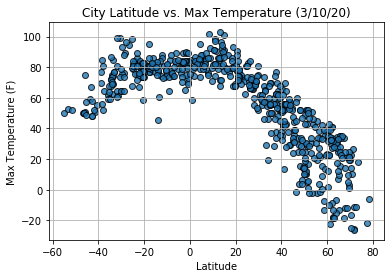

In [9]:
# Create a Scatter Plot for max temperature vs latitude

x_values = cities_df['Lat']
y_values = cities_df['Max Temp']
plt.scatter(x_values,y_values, alpha=.8, edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (3/10/20)')
plt.grid()
plt.show()

The above code displays a scatterplot with data points that represent the max temperature and latitude of every city in the cities_df data frame on March 10, 2020. The scatterplot shows that max temperature for cities decreased the farther away that city is from the equator.

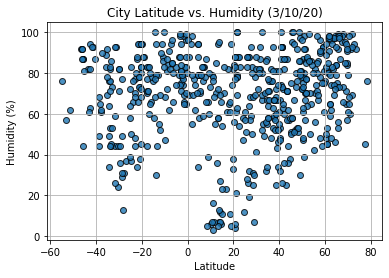

In [10]:
# Create a Scatter Plot for humidity vs latitude

x_values = cities_df['Lat']
y_values = cities_df['Humidity']
plt.scatter(x_values,y_values, alpha=.8, edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (3/10/20)')
plt.grid()
plt.show()

The above code displays a scatterplot with data points that represent the humidity percentage and latitude of every city in the cities_df data frame at a certain time on March 10, 2020. The scatterplot shows that there does not appear to be much of a relationship between humidity and latitude.

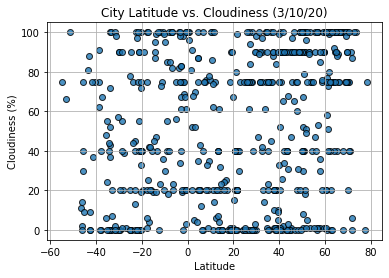

In [11]:
# Create a Scatter Plot for cloudiness vs latitude

x_values = cities_df['Lat']
y_values = cities_df['Cloudiness']
plt.scatter(x_values,y_values, alpha=.8, edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (3/10/20)')
plt.grid()
plt.show()

The above code displays a scatterplot with data points that represent the cloudiness and latitude of every city in the cities_df data frame at a certain time on March 10, 2020. From the scatterplot, it is difficult to ascertain a relationship between cloudiness and latitude, but it does appear that cloudiness percentages tend to be in increments of 20.

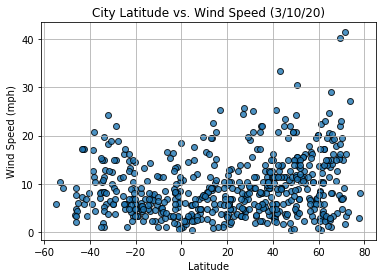

In [12]:
# Create a Scatter Plot for wind speed vs latitude

x_values = cities_df['Lat']
y_values = cities_df['Wind Speed']
plt.scatter(x_values,y_values, alpha=.8, edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (3/10/20)')
plt.grid()
plt.show()

The above code displays a scatterplot with data points that represent the wind speed and latitude of every city in the cities_df data frame at a certain time on March 10, 2020. From the scatterplot, we can determine that wind speed appears to increase when a city's latitude increases past about 40 degrees.

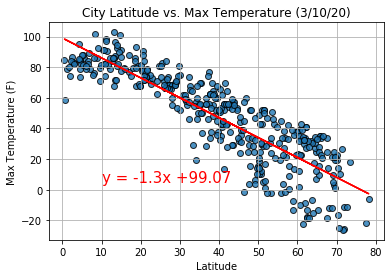

The r-squared is: -0.871334871995367


In [13]:
north_df = cities_df.loc[cities_df['Lat'] > 0]
x_values = north_df['Lat']
y_values = north_df['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values, alpha=.8, edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (3/10/20)')
plt.annotate(line_eq,(10,5),fontsize=15,color="red")
plt.grid()
plt.show()
print(f"The r-squared is: {rvalue}")

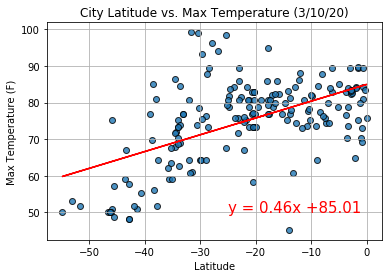

The r-squared is: 0.5572514485927347


In [14]:
south_df = cities_df.loc[cities_df['Lat'] < 0]
x_values = south_df['Lat']
y_values = south_df['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values, alpha=.8, edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (3/10/20)')
plt.annotate(line_eq,(-25,50),fontsize=15,color="red")
plt.grid()
plt.show()
print(f"The r-squared is: {rvalue}")

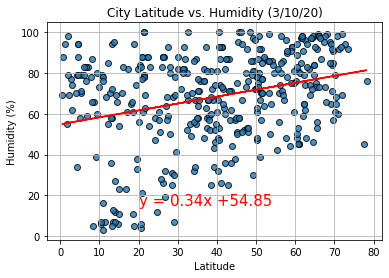

The r-squared is: 0.29631969086436644


In [15]:
north_df = cities_df.loc[cities_df['Lat'] > 0]
x_values = north_df['Lat']
y_values = north_df['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values, alpha=.8, edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (3/10/20)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.grid()
plt.show()
print(f"The r-squared is: {rvalue}")

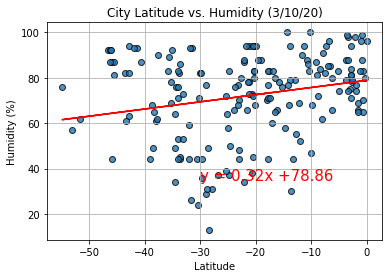

The r-squared is: 0.23174394125521006


In [16]:
south_df = cities_df.loc[cities_df['Lat'] < 0]
x_values = south_df['Lat']
y_values = south_df['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values, alpha=.8, edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (3/10/20)')
plt.annotate(line_eq,(-30,35),fontsize=15,color="red")
plt.grid()
plt.show()
print(f"The r-squared is: {rvalue}")

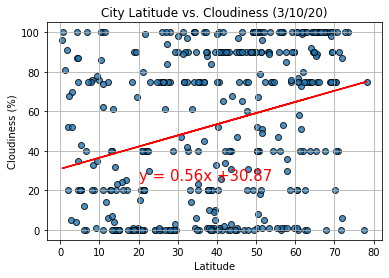

The r-squared is: 0.2938951403866722


In [17]:
north_df = cities_df.loc[cities_df['Lat'] > 0]
x_values = north_df['Lat']
y_values = north_df['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values, alpha=.8, edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (3/10/20)')
plt.annotate(line_eq,(20,25),fontsize=15,color="red")
plt.grid()
plt.show()
print(f"The r-squared is: {rvalue}")

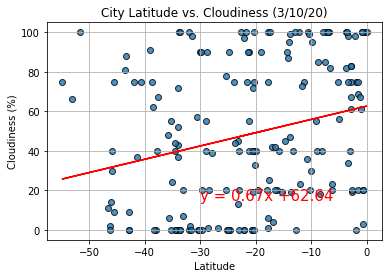

The r-squared is: 0.2561643980728917


In [18]:
south_df = cities_df.loc[cities_df['Lat'] < 0]
x_values = south_df['Lat']
y_values = south_df['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values, alpha=.8, edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (3/10/20)')
plt.annotate(line_eq,(-30,15),fontsize=15,color="red")
plt.grid()
plt.show()
print(f"The r-squared is: {rvalue}")

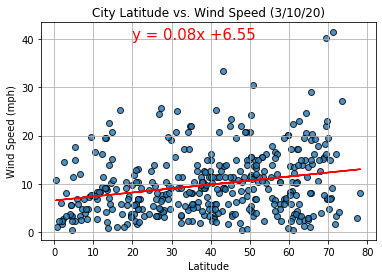

The r-squared is: 0.2502626475826349


In [19]:
north_df = cities_df.loc[cities_df['Lat'] > 0]
x_values = north_df['Lat']
y_values = north_df['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values, alpha=.8, edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (3/10/20)')
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.grid()
plt.show()
print(f"The r-squared is: {rvalue}")

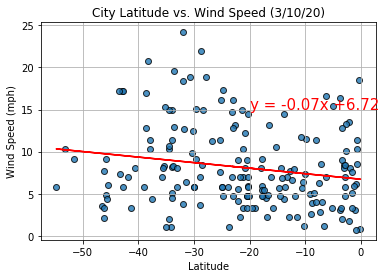

The r-squared is: -0.18639756360449763


In [20]:
south_df = cities_df.loc[cities_df['Lat'] < 0]
x_values = south_df['Lat']
y_values = south_df['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values, alpha=.8, edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (3/10/20)')
plt.annotate(line_eq,(-20,15),fontsize=15,color="red")
plt.grid()
plt.show()
print(f"The r-squared is: {rvalue}")